In [1]:
import pandas as pd

In [2]:
h_events = pd.read_csv('holidays_events.csv')
oil = pd.read_csv('oil.csv')
s_sub = pd.read_csv('sample_submission.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
trans = pd.read_csv('transactions.csv')

In [3]:
print(h_events.columns)
print(oil.columns)
print(s_sub.columns)
print(stores.columns)
print(test.columns)
print(train.columns)
print(trans.columns)

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')
Index(['date', 'dcoilwtico'], dtype='object')
Index(['id', 'sales'], dtype='object')
Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')
Index(['id', 'date', 'store_nbr', 'family', 'onpromotion'], dtype='object')
Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')
Index(['date', 'store_nbr', 'transactions'], dtype='object')


In [4]:
print(h_events.isnull().sum().sum())
print(oil.isnull().sum().sum())
print(s_sub.isnull().sum().sum())
print(stores.isnull().sum().sum())
print(test.isnull().sum().sum())
print(train.isnull().sum().sum())
print(trans.isnull().sum().sum())

0
43
0
0
0
0
0


In [5]:
print(oil.isnull().sum())

date           0
dcoilwtico    43
dtype: int64


In [6]:
print(h_events.duplicated().sum())
print(oil.duplicated().sum())
print(s_sub.duplicated().sum())
print(stores.duplicated().sum())
print(test.duplicated().sum())
print(train.duplicated().sum())
print(trans.duplicated().sum())


0
0
0
0
0
0
0


In [7]:
print(h_events.info())
print(oil.info())
print(s_sub.info())
print(stores.info())
print(test.info())
print(train.info())
print(trans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0 

In [8]:
# Convertir les dates au format datetime
h_events['date'] = pd.to_datetime(h_events['date'], format='%Y-%m-%d')
oil['date'] = pd.to_datetime(oil['date'], format='%Y-%m-%d')
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')
trans['date'] = pd.to_datetime(trans['date'], format='%Y-%m-%d')

In [9]:
print(h_events.date.min())
print(oil.date.min())
print(test.date.min())
print(train.date.min())
print(trans.date.min())

2012-03-02 00:00:00
2013-01-01 00:00:00
2017-08-16 00:00:00
2013-01-01 00:00:00
2013-01-01 00:00:00


In [10]:
print(h_events.date.max())
print(oil.date.max())
print(test.date.max())
print(train.date.max())
print(trans.date.max())

2017-12-26 00:00:00
2017-08-31 00:00:00
2017-08-31 00:00:00
2017-08-15 00:00:00
2017-08-15 00:00:00


In [11]:
data = pd.concat((train,test)).reset_index(drop=True)
data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9


In [12]:
data = pd.merge(data,h_events,how='left',on='date')
data.head()

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False


In [13]:
data = pd.merge(data,oil,how='left',on='date')
data.head()

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN


In [14]:
data = pd.merge(data,stores,how='left',on='store_nbr')
data.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13


In [15]:
data = pd.merge(data,trans,how='left',on=['date','store_nbr'])
data.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN


In [16]:
data = data.drop(['description'],axis=1)

Valeurs manquantes :

In [17]:
null_val = data.isnull().sum()
null_val = null_val[null_val!=0].sort_values(ascending=False)
print(null_val)

type_x          2578554
locale          2578554
locale_name     2578554
transferred     2578554
dcoilwtico       962280
transactions     277629
sales             28512
dtype: int64


In [18]:
data.drop(['type_x', 'locale', 'locale_name', 'transferred', 'transactions'], axis=1, inplace=True)

In [19]:
data.shape

(3082860, 11)

In [20]:
null_val = data.isnull().sum()
null_val = null_val[null_val!=0].sort_values(ascending=False)
print(null_val)

dcoilwtico    962280
sales          28512
dtype: int64


In [21]:
print("val-max : " + str(data.dcoilwtico.max()))
print("val-min : " + str(data.dcoilwtico.min()))

val-max : 110.62
val-min : 26.19


In [22]:
print("val-max : " + str(data.sales.max()))
print("val-min : " + str(data.sales.min()))

val-max : 124717.0
val-min : 0.0


In [23]:
from numpy import mean

In [24]:
data['dcoilwtico'].fillna(mean, inplace=True)  # Remplacer les valeurs nulles par la médiane

In [25]:
null_val = data.isnull().sum()
null_val = null_val[null_val!=0].sort_values(ascending=False)
print(null_val)

sales    28512
dtype: int64


In [26]:
import seaborn as sns


C:\Users\wilbi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales'>

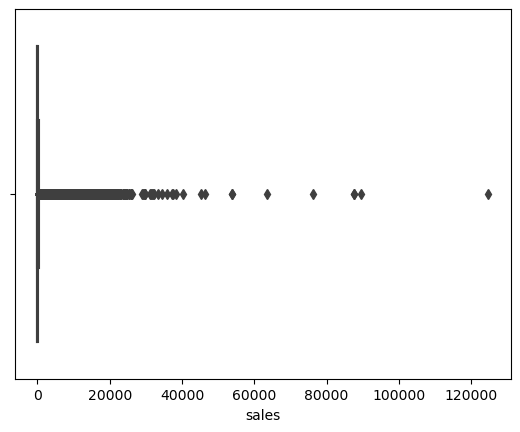

In [27]:
sns.boxplot(data['sales'])

In [28]:
data['sales'].fillna(mean, inplace=True)


In [29]:
import numpy as np
missing_values = ["n/a", "na", "--"]
data = data.replace(missing_values, np.nan)

In [30]:
data.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                  object
onpromotion             int64
dcoilwtico             object
city                   object
state                  object
type_y                 object
cluster                 int64
dtype: object

In [31]:
data['dcoilwtico'] = pd.to_numeric(data['dcoilwtico'], errors='coerce')
data['dcoilwtico'].fillna(data['dcoilwtico'].median(), inplace=True)
data['sales'] = pd.to_numeric(data['sales'], errors='coerce')
data['sales'].fillna(data['sales'].median(), inplace=True)

In [32]:
# Sélection des variables qualitatives
data_qual = data.select_dtypes(exclude='number')


In [33]:
data_qual

,date,family,city,state,type_y
0,2013-01-01,AUTOMOTIVE,Quito,Pichincha,D
1,2013-01-01,BABY CARE,Quito,Pichincha,D
2,2013-01-01,BEAUTY,Quito,Pichincha,D
3,2013-01-01,BEVERAGES,Quito,Pichincha,D
4,2013-01-01,BOOKS,Quito,Pichincha,D
...,...,...,...,...,...
3082855,2017-08-31,POULTRY,Quito,Pichincha,B
3082856,2017-08-31,PREPARED FOODS,Quito,Pichincha,B
3082857,2017-08-31,PRODUCE,Quito,Pichincha,B
3082858,2017-08-31,SCHOOL AND OFFICE SUPPLIES,Quito,Pichincha,B


In [34]:
categorical_col = [col for col in data.columns if data[col].dtype in [object, bool] and len(data[col].unique()) <= 40]

In [35]:
data.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,53.25,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,53.25,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,53.25,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,53.25,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,53.25,Quito,Pichincha,D,13


In [36]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')

# 不过这里得到的是一个数组，因此后续要将它转换为 dataframe
array_hot_encoded = ohe.fit_transform(data[categorical_col]).toarray()

# 将数组转换为dataframe
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=data.index)

# 得到其他不需要编码的字段
data_other_cols = data.drop(columns=categorical_col)

# 连接两个dataframe
data = pd.concat([data_hot_encoded, data_other_cols], axis=1)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,id,date,store_nbr,sales,onpromotion,dcoilwtico,cluster
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0,2013-01-01,1,0.0,0,53.25,13
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1,2013-01-01,1,0.0,0,53.25,13
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2,2013-01-01,1,0.0,0,53.25,13
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3,2013-01-01,1,0.0,0,53.25,13
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4,2013-01-01,1,0.0,0,53.25,13


In [37]:
data.columns = data.columns.astype(str)

In [38]:
data['date'].unique()

array(['2013-01-01T00:00:00.000000000', '2013-01-02T00:00:00.000000000',
       '2013-01-03T00:00:00.000000000', ...,
       '2017-08-29T00:00:00.000000000', '2017-08-30T00:00:00.000000000',
       '2017-08-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [39]:
data.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('<M8[ns]')], dtype=object)

In [40]:
data['date'] = data['date'].astype("category").cat.codes
data.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,id,date,store_nbr,sales,onpromotion,dcoilwtico,cluster
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0,0,1,0.0,0,53.25,13
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1,0,1,0.0,0,53.25,13
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2,0,1,0.0,0,53.25,13
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3,0,1,0.0,0,53.25,13
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4,0,1,0.0,0,53.25,13


In [41]:
data.shape

(3082860, 83)

In [42]:
train.shape, test.shape, data.shape

((3000888, 6), (28512, 5), (3082860, 83))

In [43]:
train = data.iloc[:3000888, :]
test = data.iloc[-28512:, :]
train.shape, test.shape

((3000888, 83), (28512, 83))

In [44]:
test = test.drop(['sales'], axis=1)

In [45]:
X_train = train.drop('sales', axis=1)
y_train = train.sales


### Regression linéaire :

In [46]:
from sklearn.linear_model import LinearRegression

# Modèle de régression linéaire
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

### Arbre de décision

In [47]:
from sklearn.tree import DecisionTreeRegressor

# Modèle d'arbre de décision
model2 = DecisionTreeRegressor(random_state=1)
model2.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

### Random forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Modèle de random forest
model3 = RandomForestRegressor(n_estimators=20, max_features='sqrt')
model3.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=20)

### Ridge

In [49]:
from sklearn.linear_model import Ridge
model4 = Ridge()
model4.fit(X_train, y_train)

C:\Users\wilbi\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.59581e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge()

### Lasso

In [50]:
from sklearn.linear_model import Lasso
model5= Lasso()
model5.fit(X_train, y_train)

C:\Users\wilbi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.266e+11, tolerance: 3.659e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2022)
y_pred_model1 = abs(model1.predict(X_val))
y_pred_model2 = abs(model2.predict(X_val))
y_pred_model3 = abs(model3.predict(X_val))
y_pred_model4 = abs(model4.predict(X_val))
y_pred_model5 = abs(model5.predict(X_val))

In [54]:
from sklearn.metrics import mean_squared_log_error
import math

In [55]:
print('Linear Regression:', math.sqrt(mean_squared_log_error(y_val, y_pred_model1)))
print('Arbre de décision:', math.sqrt(mean_squared_log_error(y_val, y_pred_model2)))
print('Random Forest Regression:', math.sqrt(mean_squared_log_error(y_val, y_pred_model3)))
print('Ridge Regression:', math.sqrt(mean_squared_log_error(y_val, y_pred_model4)))
print('Lasso Regression:', math.sqrt(mean_squared_log_error(y_val, y_pred_model5)))

Linear Regression: 3.25081201787442
Arbre de décision: 3.8878464213876156e-18
Random Forest Regression: 0.3978512310597141
Ridge Regression: 3.250802852719902
Lasso Regression: 3.161772380833264


In [56]:
import numpy as np

In [59]:
y_pred = model3.predict(test)
output = pd.DataFrame({'id': test.index, 'sales': np.round(y_pred, 3)})
output.to_csv('submission.csv', index=False)

In [60]:
pd.read_csv('submission.csv')

,id,sales
0,3054348,5.900
1,3054349,2.150
2,3054350,7.100
3,3054351,2349.900
4,3054352,1.150
...,...,...
28507,3082855,331.024
28508,3082856,94.204
28509,3082857,1646.266
28510,3082858,164.846


In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
y_predict1 = model1.predict(X_train)
y_predict2 = model2.predict(X_train)
y_predict3 = model3.predict(X_train)
y_predict4 = model4.predict(X_train)
y_predict5 = model5.predict(X_train)

# calcul du score
print('Linear Regression:', mean_absolute_error(y_train, y_predict1))
print('Linear Regression:', explained_variance_score(y_train, y_predict1))
print('Arbre de décision:', mean_absolute_error(y_train, y_predict2))
print('Arbre de décision:', explained_variance_score(y_train, y_predict2))
print('Random Forest Regression:', mean_absolute_error(y_train, y_predict3))
print('Random Forest Regression:', explained_variance_score(y_train, y_predict3))
print('Ridge Regression:', mean_absolute_error(y_train, y_predict4))
print('Ridge Regression:', explained_variance_score(y_train, y_predict4))
print('Lasso Regression:', mean_absolute_error(y_train, y_predict5))
print('Lasso Regression:', explained_variance_score(y_train, y_predict5))

Linear Regression: 298.1398700407146
Linear Regression: 0.5660549240466279
Arbre de décision: 1.6486375588337193e-17
Arbre de décision: 1.0
Random Forest Regression: 24.16921430129507
Random Forest Regression: 0.9904788194517629
Ridge Regression: 298.1385568347139
Ridge Regression: 0.5660549208941309
Lasso Regression: 291.4294782594606
Lasso Regression: 0.5640255971042587
